In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ForkIt/restaurants_details_cleaned.csv')

In [3]:
df.columns

Index(['Place_ID', 'Name', 'Type', 'URL', 'Vicinity',
       'Wheelchair_Accessible_Entrance', 'Dine_In', 'Editorial_Summary',
       'Reservable', 'Serves_Beer', 'Serves_Breakfast', 'Serves_Brunch',
       'Serves_Dinner', 'Serves_Lunch', 'Serves_Vegetarian_Food',
       'Serves_Wine', 'Yelp_URL', 'Latitude', 'Longitude', 'Reviews',
       'Total_Reviews', 'Photo_Reference', 'PhoneNumber', 'Price_Level',
       'Ratings', 'Cuisine'],
      dtype='object')

In [4]:
columns_needed = [
    'Place_ID', 'Name', 'Type', 'Cuisine',
    'Wheelchair_Accessible_Entrance', 'Dine_In', 'Reservable',
    'Serves_Beer', 'Serves_Breakfast', 'Serves_Brunch', 'Serves_Dinner',
    'Serves_Lunch', 'Serves_Vegetarian_Food', 'Serves_Wine',
    'Price_Level'
]

df = df[columns_needed]

df

,Place_ID,Name,Type,Cuisine,Wheelchair_Accessible_Entrance,Dine_In,Reservable,Serves_Beer,Serves_Breakfast,Serves_Brunch,Serves_Dinner,Serves_Lunch,Serves_Vegetarian_Food,Serves_Wine,Price_Level
0,ChIJkc5WLM9ZwYkRMmz1U3Em5fI,Flavor of Poland,['restaurant'],['Polish'],True,True,True,False,False,False,True,True,True,False,2.0
1,ChIJnzTECsHmw4kRPMkKgyGmY9o,tacoria,['restaurant'],['Mexican'],True,True,False,False,True,False,True,True,True,False,2.0
2,ChIJ9TgE4gVZwYkRTixvHR5CdDI,Halal Brothers,['restaurant'],"['Sandwiches', 'Halal', 'Middle Eastern']",False,True,False,False,False,True,True,True,True,False,1.0
3,ChIJkUvDKOzhw4kRVk-dF19hZx4,KC Prime Restaurant Steakhouse,['restaurant'],['Steakhouses'],True,True,True,True,False,True,True,True,NaN,True,3.0
4,ChIJg-PLzmHnw4kR86cynTbawUo,Roots Ocean Prime,"['bar', 'restaurant']","['New American', 'Seafood', 'Steakhouses']",True,True,True,True,True,True,True,True,False,True,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,ChIJmyqDrIb9w4kRuup6_Q2tcJk,The Patio at Mountain View,"['restaurant', 'bar']","['Sandwiches', 'Breakfast & Brunch']",True,True,True,True,True,True,True,True,NaN,True,2.0
461,ChIJvRSh1xJZwYkRgzblRUaX6vo,The Best Pizzeria and Restaurant,['restaurant'],['Pizza'],False,True,True,False,True,True,True,True,NaN,False,1.0
462,ChIJbVoWhTlfwYkRAbN9V_9-6GM,Afghan Kabob and Grill,['restaurant'],"['Indian', 'Halal', 'Afghan']",True,True,False,False,False,False,True,True,True,False,2.0
463,ChIJy4XgpMDmw4kRf48olBzKRcY,Jammin' Crepes,['restaurant'],"['Caterers', 'Creperies']",True,True,False,False,True,True,True,True,True,False,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Place_ID                        465 non-null    object
 1   Name                            465 non-null    object
 2   Type                            465 non-null    object
 3   Cuisine                         465 non-null    object
 4   Wheelchair_Accessible_Entrance  465 non-null    bool  
 5   Dine_In                         465 non-null    bool  
 6   Reservable                      465 non-null    bool  
 7   Serves_Beer                     465 non-null    bool  
 8   Serves_Breakfast                465 non-null    bool  
 9   Serves_Brunch                   465 non-null    bool  
 10  Serves_Dinner                   465 non-null    bool  
 11  Serves_Lunch                    465 non-null    bool  
 12  Serves_Vegetarian_Food          296 non-null    ob

In [6]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [7]:
def multihot_encode(df, column, unique_categories):
    """
    Applies multi-hot encoding to a column containing lists of categories.
    """

    for category in unique_categories:
        df[category] = df[column].apply(lambda x: 1 if category in x else 0)
    df = df.drop(column, axis=1)
    return df

df = multihot_encode(df, 'Type', ["restaurant", "bar", "bakery", "cafe"])
df


,Place_ID,Name,Cuisine,Wheelchair_Accessible_Entrance,Dine_In,Reservable,Serves_Beer,Serves_Breakfast,Serves_Brunch,Serves_Dinner,Serves_Lunch,Serves_Vegetarian_Food,Serves_Wine,Price_Level,restaurant,bar,bakery,cafe
0,ChIJkc5WLM9ZwYkRMmz1U3Em5fI,Flavor of Poland,['Polish'],True,True,True,False,False,False,True,True,True,False,2.0,1,0,0,0
1,ChIJnzTECsHmw4kRPMkKgyGmY9o,tacoria,['Mexican'],True,True,False,False,True,False,True,True,True,False,2.0,1,0,0,0
2,ChIJ9TgE4gVZwYkRTixvHR5CdDI,Halal Brothers,"['Sandwiches', 'Halal', 'Middle Eastern']",False,True,False,False,False,True,True,True,True,False,1.0,1,0,0,0
3,ChIJkUvDKOzhw4kRVk-dF19hZx4,KC Prime Restaurant Steakhouse,['Steakhouses'],True,True,True,True,False,True,True,True,NaN,True,3.0,1,0,0,0
4,ChIJg-PLzmHnw4kR86cynTbawUo,Roots Ocean Prime,"['New American', 'Seafood', 'Steakhouses']",True,True,True,True,True,True,True,True,False,True,3.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,ChIJmyqDrIb9w4kRuup6_Q2tcJk,The Patio at Mountain View,"['Sandwiches', 'Breakfast & Brunch']",True,True,True,True,True,True,True,True,NaN,True,2.0,1,1,0,0
461,ChIJvRSh1xJZwYkRgzblRUaX6vo,The Best Pizzeria and Restaurant,['Pizza'],False,True,True,False,True,True,True,True,NaN,False,1.0,1,0,0,0
462,ChIJbVoWhTlfwYkRAbN9V_9-6GM,Afghan Kabob and Grill,"['Indian', 'Halal', 'Afghan']",True,True,False,False,False,False,True,True,True,False,2.0,1,0,0,0
463,ChIJy4XgpMDmw4kRf48olBzKRcY,Jammin' Crepes,"['Caterers', 'Creperies']",True,True,False,False,True,True,True,True,True,False,2.0,1,0,0,0


In [8]:
unique_cuisines = [
    "American", "Italian", "Pizza", "Sandwiches", "Breakfast & Brunch", "New American",
    "Burgers", "Seafood", "Mexican", "Salad", "Chinese", "Fast Food", "Latin American",
    "Indian", "Sushi Bars", "Delis", "Chicken Wings", "Desserts", "Diners",
    "Asian Fusion", "Halal", "Steakhouses", "Caribbean", "Japanese", "Thai",
    "Mediterranean", "Spanish", "Vegetarian", "Barbeque", "Soup", "Middle Eastern",
    "Ramen", "Coffee & Tea", "Soul Food", "Caterers", "Noodles",
    "Pakistani", "Tacos", "Ice Cream", "Frozen Yogurt", "French", "Pancakes", "Tex-Mex",
    "Gluten-Free", "Vegan", "Comfort Food", "Afghan", "Southern", "Greek", "Turkish",
    "Cajun/Creole", "Vietnamese", "Cheesesteaks", "Korean", "Polish", "Haitian",
    "Hot Dogs", "Poke", "Hot Pot", "Buffets", "Food Trucks", "Empanadas",
    "Tapas/Small Plates", "Creperies", "Teppanyaki", "Moroccan", "Venezuelan",
    "Falafel", "Szechuan", "New Mexican Cuisine", "German", "Hungarian", "Portuguese",
    "Iberian", "Colombian", "Dominican", "Modern European", "Kebab", "Filipino"
]

df = multihot_encode(df, 'Cuisine', unique_cuisines)
df

,Place_ID,Name,Wheelchair_Accessible_Entrance,Dine_In,Reservable,Serves_Beer,Serves_Breakfast,Serves_Brunch,Serves_Dinner,Serves_Lunch,...,New Mexican Cuisine,German,Hungarian,Portuguese,Iberian,Colombian,Dominican,Modern European,Kebab,Filipino
0,ChIJkc5WLM9ZwYkRMmz1U3Em5fI,Flavor of Poland,True,True,True,False,False,False,True,True,...,0,0,0,0,0,0,0,0,0,0
1,ChIJnzTECsHmw4kRPMkKgyGmY9o,tacoria,True,True,False,False,True,False,True,True,...,0,0,0,0,0,0,0,0,0,0
2,ChIJ9TgE4gVZwYkRTixvHR5CdDI,Halal Brothers,False,True,False,False,False,True,True,True,...,0,0,0,0,0,0,0,0,0,0
3,ChIJkUvDKOzhw4kRVk-dF19hZx4,KC Prime Restaurant Steakhouse,True,True,True,True,False,True,True,True,...,0,0,0,0,0,0,0,0,0,0
4,ChIJg-PLzmHnw4kR86cynTbawUo,Roots Ocean Prime,True,True,True,True,True,True,True,True,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,ChIJmyqDrIb9w4kRuup6_Q2tcJk,The Patio at Mountain View,True,True,True,True,True,True,True,True,...,0,0,0,0,0,0,0,0,0,0
461,ChIJvRSh1xJZwYkRgzblRUaX6vo,The Best Pizzeria and Restaurant,False,True,True,False,True,True,True,True,...,0,0,0,0,0,0,0,0,0,0
462,ChIJbVoWhTlfwYkRAbN9V_9-6GM,Afghan Kabob and Grill,True,True,False,False,False,False,True,True,...,0,0,0,0,0,0,0,0,0,0
463,ChIJy4XgpMDmw4kRf48olBzKRcY,Jammin' Crepes,True,True,False,False,True,True,True,True,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df["Serves_Vegetarian_Food"].fillna(False, inplace=True)
df["Serves_Vegetarian_Food"]

<ipython-input-9-2f52020861c9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Serves_Vegetarian_Food"].fillna(False, inplace=True)
<ipython-input-9-2f52020861c9>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Serves_Vegetarian_Food"].fillna(False, inplace=True)


,Serves_Vegetarian_Food
0,True
1,True
2,True
3,False
4,False
...,...
460,False
461,False
462,True
463,True


In [10]:
binary_features = ['Wheelchair_Accessible_Entrance', 'Dine_In', 'Reservable',
                   'Serves_Beer', 'Serves_Breakfast', 'Serves_Brunch', 'Serves_Dinner',
                   'Serves_Lunch', 'Serves_Vegetarian_Food', 'Serves_Wine']

df[binary_features] = df[binary_features].astype(int)

In [11]:
df

,Place_ID,Name,Wheelchair_Accessible_Entrance,Dine_In,Reservable,Serves_Beer,Serves_Breakfast,Serves_Brunch,Serves_Dinner,Serves_Lunch,...,New Mexican Cuisine,German,Hungarian,Portuguese,Iberian,Colombian,Dominican,Modern European,Kebab,Filipino
0,ChIJkc5WLM9ZwYkRMmz1U3Em5fI,Flavor of Poland,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,ChIJnzTECsHmw4kRPMkKgyGmY9o,tacoria,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ChIJ9TgE4gVZwYkRTixvHR5CdDI,Halal Brothers,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ChIJkUvDKOzhw4kRVk-dF19hZx4,KC Prime Restaurant Steakhouse,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ChIJg-PLzmHnw4kR86cynTbawUo,Roots Ocean Prime,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,ChIJmyqDrIb9w4kRuup6_Q2tcJk,The Patio at Mountain View,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
461,ChIJvRSh1xJZwYkRgzblRUaX6vo,The Best Pizzeria and Restaurant,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
462,ChIJbVoWhTlfwYkRAbN9V_9-6GM,Afghan Kabob and Grill,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
463,ChIJy4XgpMDmw4kRf48olBzKRcY,Jammin' Crepes,1,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df["Price_Level"] = df["Price_Level"].replace("Unavailable", pd.NA).fillna(df["Price_Level"].mode()[0])

In [13]:
df['Price_Level'].value_counts()

,count
Price_Level,
2.0,318
1.0,121
3.0,22
4.0,4


In [14]:
df['Price_Level'] = pd.to_numeric(df['Price_Level'], errors='coerce')
df['Price_Level'] = df['Price_Level'].astype(int)
df['Price_Level'].value_counts()

,count
Price_Level,
2,318
1,121
3,22
4,4


In [15]:
df.shape

(465, 96)

In [16]:
df

,Place_ID,Name,Wheelchair_Accessible_Entrance,Dine_In,Reservable,Serves_Beer,Serves_Breakfast,Serves_Brunch,Serves_Dinner,Serves_Lunch,...,New Mexican Cuisine,German,Hungarian,Portuguese,Iberian,Colombian,Dominican,Modern European,Kebab,Filipino
0,ChIJkc5WLM9ZwYkRMmz1U3Em5fI,Flavor of Poland,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,ChIJnzTECsHmw4kRPMkKgyGmY9o,tacoria,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ChIJ9TgE4gVZwYkRTixvHR5CdDI,Halal Brothers,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ChIJkUvDKOzhw4kRVk-dF19hZx4,KC Prime Restaurant Steakhouse,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ChIJg-PLzmHnw4kR86cynTbawUo,Roots Ocean Prime,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,ChIJmyqDrIb9w4kRuup6_Q2tcJk,The Patio at Mountain View,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
461,ChIJvRSh1xJZwYkRgzblRUaX6vo,The Best Pizzeria and Restaurant,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
462,ChIJbVoWhTlfwYkRAbN9V_9-6GM,Afghan Kabob and Grill,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
463,ChIJy4XgpMDmw4kRf48olBzKRcY,Jammin' Crepes,1,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

feature_columns = df.drop(columns=['Place_ID', 'Name'])
feature_columns.head()

,Wheelchair_Accessible_Entrance,Dine_In,Reservable,Serves_Beer,Serves_Breakfast,Serves_Brunch,Serves_Dinner,Serves_Lunch,Serves_Vegetarian_Food,Serves_Wine,...,New Mexican Cuisine,German,Hungarian,Portuguese,Iberian,Colombian,Dominican,Modern European,Kebab,Filipino
0,1,1,1,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


Optimal number of components: 50


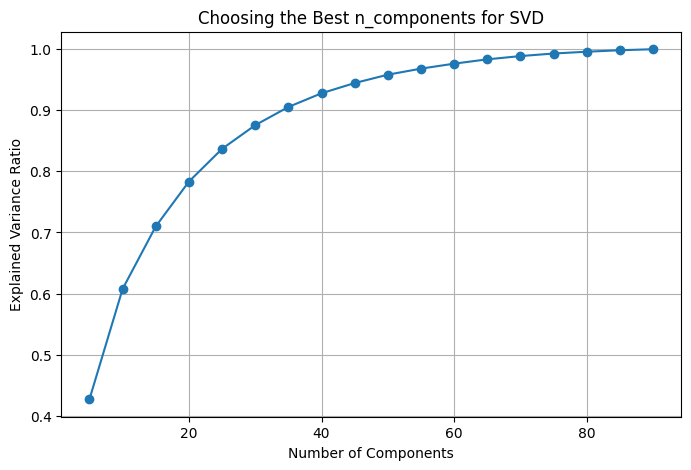

In [18]:
n_components_list = list(range(5, min(96, feature_columns.shape[1]), 5))
explained_variance_ratios = []

for n in n_components_list:
    svd = TruncatedSVD(n_components=n, random_state=42)
    svd.fit(feature_columns)
    explained_variance_ratios.append(np.sum(svd.explained_variance_ratio_))

optimal_n_components = next((n for n, var in zip(n_components_list, explained_variance_ratios) if var >= 0.95), n_components_list[-1])
print(f"Optimal number of components: {optimal_n_components}")

plt.figure(figsize=(8, 5))
plt.plot(n_components_list, explained_variance_ratios, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Choosing the Best n_components for SVD")
plt.grid()
plt.show()

In [19]:
svd = TruncatedSVD(n_components=optimal_n_components, random_state=42)
reduced_vectors = svd.fit_transform(feature_columns)

In [20]:
df

,Place_ID,Name,Wheelchair_Accessible_Entrance,Dine_In,Reservable,Serves_Beer,Serves_Breakfast,Serves_Brunch,Serves_Dinner,Serves_Lunch,...,New Mexican Cuisine,German,Hungarian,Portuguese,Iberian,Colombian,Dominican,Modern European,Kebab,Filipino
0,ChIJkc5WLM9ZwYkRMmz1U3Em5fI,Flavor of Poland,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,ChIJnzTECsHmw4kRPMkKgyGmY9o,tacoria,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ChIJ9TgE4gVZwYkRTixvHR5CdDI,Halal Brothers,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ChIJkUvDKOzhw4kRVk-dF19hZx4,KC Prime Restaurant Steakhouse,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ChIJg-PLzmHnw4kR86cynTbawUo,Roots Ocean Prime,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,ChIJmyqDrIb9w4kRuup6_Q2tcJk,The Patio at Mountain View,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
461,ChIJvRSh1xJZwYkRgzblRUaX6vo,The Best Pizzeria and Restaurant,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
462,ChIJbVoWhTlfwYkRAbN9V_9-6GM,Afghan Kabob and Grill,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
463,ChIJy4XgpMDmw4kRf48olBzKRcY,Jammin' Crepes,1,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_reduced = pd.DataFrame(reduced_vectors, columns=[f"Component_{i+1}" for i in range(optimal_n_components)])

df_reduced.insert(0, "Place_ID", df["Place_ID"])
df_reduced.insert(1, "Name", df["Name"])
df_reduced

,Place_ID,Name,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,...,Component_41,Component_42,Component_43,Component_44,Component_45,Component_46,Component_47,Component_48,Component_49,Component_50
0,ChIJkc5WLM9ZwYkRMmz1U3Em5fI,Flavor of Poland,3.023125,0.332729,1.084502,0.296430,0.200795,0.086331,0.073320,-0.404011,...,-0.003693,0.047050,-0.019677,0.061270,-0.054753,-0.142597,-0.069269,-0.054315,0.143883,-0.137042
1,ChIJnzTECsHmw4kRPMkKgyGmY9o,tacoria,3.061201,-0.507647,0.706090,0.394968,0.428983,-0.394489,-0.114095,0.184076,...,-0.043388,-0.035573,-0.033754,-0.030541,-0.006630,-0.056095,0.036776,-0.012143,-0.014906,-0.001347
2,ChIJ9TgE4gVZwYkRTixvHR5CdDI,Halal Brothers,2.279145,-0.599353,0.443322,-0.089782,0.183336,-0.086091,-0.145430,0.357235,...,0.090536,-0.312617,0.343584,0.003956,0.087587,0.010082,0.192756,0.029216,0.008825,0.023668
3,ChIJkUvDKOzhw4kRVk-dF19hZx4,KC Prime Restaurant Steakhouse,3.891110,0.917881,-0.259152,0.547412,-0.799367,-0.176569,-0.432054,-0.383003,...,0.087337,-0.060239,-0.043191,-0.150899,-0.364580,0.042593,-0.012468,0.107760,0.140744,-0.033873
4,ChIJg-PLzmHnw4kR86cynTbawUo,Roots Ocean Prime,4.303513,0.939936,-1.359554,0.582533,-0.187267,-0.188198,0.090980,-0.174618,...,0.065126,-0.182455,-0.132889,-0.184401,-0.264383,0.019814,0.033605,0.056950,0.109106,-0.011601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,ChIJmyqDrIb9w4kRuup6_Q2tcJk,The Patio at Mountain View,3.621270,0.433268,-0.866197,-0.686770,-0.368225,-0.085963,-0.752912,-0.066222,...,0.001699,0.069626,0.009577,0.050743,0.010127,0.013339,-0.015870,-0.008895,-0.022557,-0.024847
461,ChIJvRSh1xJZwYkRgzblRUaX6vo,The Best Pizzeria and Restaurant,2.484465,-0.682020,-0.181520,-0.447091,-0.637558,0.685389,0.443469,-0.108989,...,0.000387,0.065510,0.028055,-0.009731,-0.017734,-0.023757,-0.076387,0.003324,0.021770,-0.045784
462,ChIJbVoWhTlfwYkRAbN9V_9-6GM,Afghan Kabob and Grill,2.862061,-0.060286,1.104748,0.507683,0.377805,-0.573708,-0.180504,0.009908,...,-0.094133,-0.016629,-0.218843,-0.180000,-0.205337,-0.028341,0.019459,-0.164240,-0.432878,0.276244
463,ChIJy4XgpMDmw4kRf48olBzKRcY,Jammin' Crepes,3.280396,-0.760761,0.375307,0.173280,0.264986,-0.155610,-0.296380,0.322265,...,0.345592,-0.233363,-0.156972,0.281336,-0.177042,0.463275,-0.473378,-0.204021,-0.280040,0.083590


In [22]:
df.to_pickle('/content/drive/MyDrive/ForkIt/restaurantVectors.pkl')

In [23]:
columns = [
    "Wheelchair_Accessible_Entrance", "Dine_In", "Reservable", "Serves_Beer", "Serves_Breakfast", "Serves_Brunch",
    "Serves_Dinner", "Serves_Lunch", "Serves_Vegetarian_Food", "Serves_Wine", "Price_Level", "restaurant", "bar",
    "bakery", "cafe", "American", "Italian", "Pizza", "Sandwiches", "Breakfast & Brunch", "New American", "Burgers",
    "Seafood", "Mexican", "Salad", "Chinese", "Fast Food", "Latin American", "Indian", "Sushi Bars", "Delis",
    "Chicken Wings", "Desserts", "Diners", "Asian Fusion", "Halal", "Steakhouses", "Caribbean", "Japanese", "Thai",
    "Mediterranean", "Spanish", "Vegetarian", "Barbeque", "Soup", "Middle Eastern", "Ramen", "Coffee & Tea",
    "Soul Food", "Caterers", "Noodles", "Pakistani", "Tacos", "Ice Cream", "Frozen Yogurt", "French", "Pancakes",
    "Tex-Mex", "Gluten-Free", "Vegan", "Comfort Food", "Afghan", "Southern", "Greek", "Turkish", "Cajun/Creole",
    "Vietnamese", "Cheesesteaks", "Korean", "Polish", "Haitian", "Hot Dogs", "Poke", "Hot Pot", "Buffets",
    "Food Trucks", "Empanadas", "Tapas/Small Plates", "Creperies", "Teppanyaki", "Moroccan", "Venezuelan",
    "Falafel", "Szechuan", "New Mexican Cuisine", "German", "Hungarian", "Portuguese", "Iberian", "Colombian",
    "Dominican", "Modern European", "Kebab", "Filipino"
]

user_vector = [
    1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
]
user_df = pd.DataFrame([user_vector], columns=columns)
user_df

,Wheelchair_Accessible_Entrance,Dine_In,Reservable,Serves_Beer,Serves_Breakfast,Serves_Brunch,Serves_Dinner,Serves_Lunch,Serves_Vegetarian_Food,Serves_Wine,...,New Mexican Cuisine,German,Hungarian,Portuguese,Iberian,Colombian,Dominican,Modern European,Kebab,Filipino
0,1,0,0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
from sklearn.metrics.pairwise import cosine_similarity

user_vector_reduced = svd.transform(user_df)
cosine_similarities = cosine_similarity(user_vector_reduced, reduced_vectors)
top_5_indices = np.argsort(cosine_similarities[0])[::-1][:5]
top_5_restaurants = df.iloc[top_5_indices][['Place_ID', 'Name']]
top_5_restaurants['Similarity'] = cosine_similarities[0][top_5_indices]
top_5_restaurants

,Place_ID,Name,Similarity
369,ChIJ60xuDGPnw4kRfzSp808iOC4,maman,0.789437
229,ChIJq6pqzr78w4kRA7L4YbNLMW4,Gretalia Hospitality Group,0.744034
287,ChIJcXs4X97nw4kRk1wOoo1wg5Q,"Ficus | Restaurant, Cafe & Gallery",0.719698
447,ChIJYX13PUhfwYkR585qpUtECdQ,PJ's Pancake House & Tavern - Robbinsville,0.716205
120,ChIJP0Fjak5fwYkR9_sLF3E9HYk,The Arvo,0.714809


In [25]:
place_ids_ordered = [
    "ChIJ60xuDGPnw4kRfzSp808iOC4",
    "ChIJq6pqzr78w4kRA7L4YbNLMW4",
    "ChIJcXs4X97nw4kRk1wOoo1wg5Q",
    "ChIJYX13PUhfwYkR585qpUtECdQ",
    "ChIJP0Fjak5fwYkR9_sLF3E9HYk"
]
df.set_index("Place_ID").loc[place_ids_ordered].reset_index()


,Place_ID,Name,Wheelchair_Accessible_Entrance,Dine_In,Reservable,Serves_Beer,Serves_Breakfast,Serves_Brunch,Serves_Dinner,Serves_Lunch,...,New Mexican Cuisine,German,Hungarian,Portuguese,Iberian,Colombian,Dominican,Modern European,Kebab,Filipino
0,ChIJ60xuDGPnw4kRfzSp808iOC4,maman,1,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,ChIJq6pqzr78w4kRA7L4YbNLMW4,Gretalia Hospitality Group,1,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ChIJcXs4X97nw4kRk1wOoo1wg5Q,"Ficus | Restaurant, Cafe & Gallery",1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ChIJYX13PUhfwYkR585qpUtECdQ,PJ's Pancake House & Tavern - Robbinsville,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ChIJP0Fjak5fwYkR9_sLF3E9HYk,The Arvo,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
import pickle
with open('/content/drive/MyDrive/ForkIt/svd_model.pkl', 'wb') as f:
    pickle.dump(svd, f)